<a href="https://colab.research.google.com/github/BrahmaTeja7/Dissertation_Reserach_Code/blob/main/Fake_News_Prediction_using_TfIdf_Vectorizer_5fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries for finding the accuracy of the selected Machine learning models in predicting the fake news.**

In [ ]:
#Libraries for data manipulation
import numpy as np
import pandas as pd

#Libraries for text modification and preprocessing
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#Libraries for Natural Language Processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Training the models
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score, precision_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from scipy.stats import uniform, randint,expon
import time


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Loading the Dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv('/content/Fake&True_News.csv')

# **Preliminary Checks**

In [ ]:
dataset.shape

(44867, 5)

### **Shuffling the dataset row set records**

In [ ]:
shuffled_dataset = dataset.sample(frac=1.0)
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

### **Creating a new column "label" to convert the values of True or False to 0 & 1.**

In [ ]:
shuffled_dataset['label'] = np.where(shuffled_dataset['marker'] == True, 0, 1)
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

**Converting the text to lowercase**

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['text'].str.lower()
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

**Removing the Punctuations in the text**

In [ ]:
def removing_punctuations(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_punctuations(x))
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

**Removing the stopwords in text column**

In [ ]:
Stopword = set(stopwords.words('english'))
def removing_stopwords(text):
  return " ".join([word for word in text.split() if word not in Stopword])

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: removing_stopwords(x))
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

**Removing the special Characters, Html tags, Url in text column**

In [ ]:
def remove_chars_url_htmlTags(text):
  text = re.sub('[^a-zA-Z0-9]', ' ',text)
  text = re.sub('\s+', ' ',text)
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  text = re.sub(r'<.*?>','',text)
  return text

In [ ]:
shuffled_dataset['processing_text'] = shuffled_dataset['processing_text'].apply(lambda x: remove_chars_url_htmlTags(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text
5616,Here’s How Much California Would Bring In Eve...,Californians have a choice ahead of them. In N...,News,03-Jul-16,False,1,californians choice ahead november citizens go...
28983,Exclusive - Trump border 'wall' to cost $21.6 ...,WASHINGTON (Reuters) - President Donald Trump...,politicsNews,09-Feb-17,True,0,washington reuters president donald trump s wa...
35952,Hundreds of thousands in Israel mourn 104-year...,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",worldnews,12-Dec-17,True,0,bnei brak israel reuters hundreds thousands ul...
10314,LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...,A group of volunteer soldiers announced this w...,politics,25-Jul-17,False,1,group volunteer soldiers announced week first ...
38334,Suitcase of sapphires and other gems worth 1 m...,LONDON (Reuters) - British police were hunting...,worldnews,14-Nov-17,True,0,london reuters british police hunting unidenti...


**Checking the list of common words used in the dataset**

In [ ]:
from collections import Counter
word_count = Counter()
for text in shuffled_dataset['processing_text']:
  for word in text.split():
    word_count[word]+= 1

word_count.most_common(1000)


[('said', 129916),
 ('trump', 127445),
 ('us', 62760),
 ('s', 54953),
 ('would', 54736),
 ('president', 51795),
 ('people', 41065),
 ('one', 35213),
 ('state', 31967),
 ('also', 30851),
 ('new', 30677),
 ('reuters', 28764),
 ('donald', 27496),
 ('clinton', 27189),
 ('house', 27013),
 ('obama', 26905),
 ('government', 26657),
 ('states', 25935),
 ('republican', 24293),
 ('could', 23774),
 ('united', 23394),
 ('told', 23317),
 ('white', 22124),
 ('like', 21947),
 ('campaign', 21041),
 ('last', 20369),
 ('news', 19830),
 ('two', 19828),
 ('party', 19750),
 ('time', 19453),
 ('election', 19355),
 ('first', 18420),
 ('washington', 17706),
 ('former', 17572),
 ('year', 17451),
 ('even', 17424),
 ('country', 17404),
 ('many', 16227),
 ('hillary', 16134),
 ('years', 15878),
 ('security', 15545),
 ('may', 15343),
 ('say', 15179),
 ('national', 15123),
 ('political', 14975),
 ('made', 14825),
 ('media', 14820),
 ('get', 14680),
 ('law', 14628),
 ('police', 14505),
 ('make', 14489),
 ('court', 14

**Checking the list of rare words used in the dataset**

In [ ]:
Rare_words = set(word for (word, wc) in word_count.most_common()[:-100:-1])
Rare_words

{'10692',
 '1cent',
 '3125',
 '31bn',
 '3sootjobs',
 '8590',
 'abrogating',
 'algorithmdriven',
 'amendmentduring',
 'arbitrationlike',
 'arbitrationstyle',
 'arecrooked',
 'armpit',
 'attentionbeyond',
 'azari',
 'bestpositioned',
 'bogalusa',
 'bukewihge',
 'cakethe',
 'centergrimes',
 'cheaperanalysts',
 'clintongiustra',
 'constructand',
 'counseltrump',
 'ctrltech',
 'dales',
 'deliveroh',
 'dodgeball',
 'dollarsphoto',
 'downduring',
 'farshad',
 'fertilize',
 'firebase',
 'flowering',
 'foundationsecond',
 'fussed',
 'gawkertrump',
 'globetrotted',
 'growthwhat',
 'happenmexico',
 'hecklercnn',
 'herewhite',
 'hillarynoticing',
 'httpstconsohreczli',
 'hyperbolize',
 'jahromi',
 'jawbone',
 'jobhunting',
 'l5n1m119t',
 'legallythe',
 'locallyeducated',
 'lynde',
 'maccoby',
 'machinethe',
 'marburger',
 'minbok',
 'minutegamble',
 'nganbrendan',
 'ninefigure',
 'noncoastal',
 'oftenbrusque',
 'oneactually',
 'opcruz',
 'paymexican',
 'pdjtwe',
 'percentowned',
 'philanthropybut'

**Initializing Porter Stemmer function and applying stemming to reduce the text to their root word**

In [ ]:
port_stemming = PorterStemmer()

In [ ]:
def stemming(text):
  return " ".join([port_stemming.stem(word) for word in text.split()])

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['processing_text'].apply(lambda x: stemming(x))
shuffled_dataset.head()

,title,text,subject,date,marker,label,processing_text,stemmed_text
5616,Here’s How Much California Would Bring In Eve...,Californians have a choice ahead of them. In N...,News,03-Jul-16,False,1,californians choice ahead november citizens go...,californian choic ahead novemb citizen golden ...
28983,Exclusive - Trump border 'wall' to cost $21.6 ...,WASHINGTON (Reuters) - President Donald Trump...,politicsNews,09-Feb-17,True,0,washington reuters president donald trump s wa...,washington reuter presid donald trump s wall a...
35952,Hundreds of thousands in Israel mourn 104-year...,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",worldnews,12-Dec-17,True,0,bnei brak israel reuters hundreds thousands ul...,bnei brak israel reuter hundr thousand ultraor...
10314,LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...,A group of volunteer soldiers announced this w...,politics,25-Jul-17,False,1,group volunteer soldiers announced week first ...,group volunt soldier announc week first ever l...
38334,Suitcase of sapphires and other gems worth 1 m...,LONDON (Reuters) - British police were hunting...,worldnews,14-Nov-17,True,0,london reuters british police hunting unidenti...,london reuter british polic hunt unidentifi ma...


**Tokenizing the words in the text column**

In [ ]:
def token(text):
  return word_tokenize(text)

In [ ]:
shuffled_dataset['stemmed_text'] = shuffled_dataset['stemmed_text'].apply(lambda x: token(x))
print(shuffled_dataset)

                                                   title  \
5616    Here’s How Much California Would Bring In Eve...   
28983  Exclusive - Trump border 'wall' to cost $21.6 ...   
35952  Hundreds of thousands in Israel mourn 104-year...   
10314  LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...   
38334  Suitcase of sapphires and other gems worth 1 m...   
...                                                  ...   
8736    Watch Carly Fiorina Lose Her Damn Mind As She...   
35293  Beijing condemns Taiwan probe into tiny pro-Ch...   
7867    Racist High Schoolers Chant ‘Trump! Trump! US...   
8813    Bombshell Reveals Nazi Connection To the Koch...   
33088    Treading cautiously, House's Ryan to meet Trump   

                                                    text       subject  \
5616   Californians have a choice ahead of them. In N...          News   
28983   WASHINGTON (Reuters) - President Donald Trump...  politicsNews   
35952  BNEI BRAK, Israel (Reuters) - Hundreds of thou... 

**Removing unused columns from the dataset**

In [ ]:
shuffled_dataset = shuffled_dataset.drop(['date','marker'],axis=1)
shuffled_dataset

,title,text,subject,label,processing_text,stemmed_text
5616,Here’s How Much California Would Bring In Eve...,Californians have a choice ahead of them. In N...,News,1,californians choice ahead november citizens go...,"[californian, choic, ahead, novemb, citizen, g..."
28983,Exclusive - Trump border 'wall' to cost $21.6 ...,WASHINGTON (Reuters) - President Donald Trump...,politicsNews,0,washington reuters president donald trump s wa...,"[washington, reuter, presid, donald, trump, s,..."
35952,Hundreds of thousands in Israel mourn 104-year...,"BNEI BRAK, Israel (Reuters) - Hundreds of thou...",worldnews,0,bnei brak israel reuters hundreds thousands ul...,"[bnei, brak, israel, reuter, hundr, thousand, ..."
10314,LGBT VOLUNTEERS Aren’t Waiting To Be Thrown Of...,A group of volunteer soldiers announced this w...,politics,1,group volunteer soldiers announced week first ...,"[group, volunt, soldier, announc, week, first,..."
38334,Suitcase of sapphires and other gems worth 1 m...,LONDON (Reuters) - British police were hunting...,worldnews,0,london reuters british police hunting unidenti...,"[london, reuter, british, polic, hunt, unident..."
...,...,...,...,...,...,...
8736,Watch Carly Fiorina Lose Her Damn Mind As She...,One really has to wonder why Carly Fiorina is ...,News,1,one really wonder carly fiorina still running ...,"[one, realli, wonder, carli, fiorina, still, r..."
35293,Beijing condemns Taiwan probe into tiny pro-Ch...,BEIJING/TAIPEI (Reuters) - China has condemned...,worldnews,0,beijingtaipei reuters china condemned taiwan g...,"[beijingtaipei, reuter, china, condemn, taiwan..."
7867,Racist High Schoolers Chant ‘Trump! Trump! US...,It s becoming clearer and clearer that an Amer...,News,1,becoming clearer clearer america donald trump ...,"[becom, clearer, clearer, america, donald, tru..."
8813,Bombshell Reveals Nazi Connection To the Koch...,The infamous conservative Republican financier...,News,1,infamous conservative republican financiers ch...,"[infam, conserv, republican, financi, charl, d..."


**Creating Train and Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.text, shuffled_dataset.label, test_size=0.25)

In [ ]:
print('X_train:', X_train.shape,
      'X_test:', X_test.shape,
      'y_train:', y_train.shape,
      'y_test:', y_test.shape)


X_train: (33650,) X_test: (11217,) y_train: (33650,) y_test: (11217,)


**Applying TfIdf Vectorizer**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.values)
#y_train = shuffled_dataset.label

In [ ]:
X_train_tfidf

<33650x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 7872945 stored elements in Compressed Sparse Row format>

**Creating Vocabulary to store the words**

In [ ]:
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()

print(tfidf_vocabulary)

['000' '000 people' '10' ... 'youtube' 'zero' 'zone']


In [ ]:
print(X_train_tfidf[15].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


# **Initializing the selected Machine learning models**

In [ ]:
svm_model = SVC()
nb_model = MultinomialNB()
xgb_model = xgb.XGBClassifier()

# **Defining Hyperparameters for selected Machine learning algorithms**

In [ ]:
svm_param_distributions = {'C': uniform(0.7, 1), 'kernel': ['linear']}
nb_param_distributions = {'alpha': uniform(0.5, 10)}
xgb_param_distributions = {'n_estimators': randint(50, 100), 'max_depth': randint(3, 8)}

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# **Multinomial Naive Bayes**

In [ ]:
random_search = RandomizedSearchCV(estimator=nb_model, param_distributions=nb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training the MNB**

In [ ]:
start_time_MNB_training = time.time()

random_search.fit(X_train_tfidf, y_train)

end_time_MNB_training = time.time()
elapsed_time_MNB_training = end_time_MNB_training - start_time_MNB_training



Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_MNB_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 1.992220163345337 seconds
Best Parameters:  {'alpha': 0.5011437481734489}
Best Accuracy:  0.9516790490341753


**Testing the MNB**

In [ ]:
start_time_MNB_testing = time.time()

X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_tfidf)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Multinomial Naive Bayes :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_MNB_testing = time.time()
elapsed_time_MNB_testing = end_time_MNB_testing - start_time_MNB_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_MNB_testing} seconds")

Accuracy score for Multinomial Naive Bayes : 0.9481144691093876

******************************************************

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5365
           1       0.95      0.95      0.95      5852

    accuracy                           0.95     11217
   macro avg       0.95      0.95      0.95     11217
weighted avg       0.95      0.95      0.95     11217


******************************************************

Time taken: 9.746816873550415 seconds


Confusion matrix for MNB

Confusion Matrix:
[[5088  277]
 [ 305 5547]]


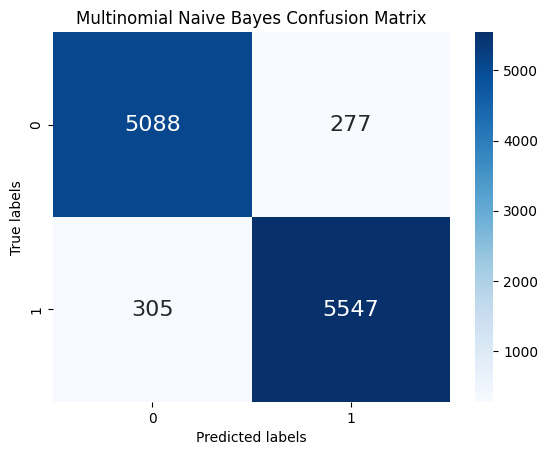

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Creating a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Multinomial Naive Bayes Confusion Matrix')

# Display the plot
plt.show()

**Printing the values of X_test variable**

In [ ]:
print(X_test_tfidf)

  (0, 4982)	0.06410511768782838
  (0, 4965)	0.02194190442111655
  (0, 4962)	0.013453180469267651
  (0, 4949)	0.022999746237186307
  (0, 4942)	0.041760895816669225
  (0, 4937)	0.02947168460381643
  (0, 4931)	0.02044086116989009
  (0, 4928)	0.024664627276334637
  (0, 4926)	0.017741235067080367
  (0, 4924)	0.05403589336819589
  (0, 4918)	0.021010142597799104
  (0, 4909)	0.027936530284131428
  (0, 4907)	0.03908068126955802
  (0, 4892)	0.05457928305440691
  (0, 4883)	0.04248339183841714
  (0, 4868)	0.010756748634976587
  (0, 4856)	0.027525322374797146
  (0, 4854)	0.03126069957910452
  (0, 4852)	0.023580659025457952
  (0, 4850)	0.0529048924568895
  (0, 4848)	0.07436299722156864
  (0, 4845)	0.016896124301812733
  (0, 4844)	0.030238421534696008
  (0, 4841)	0.028152015120207614
  (0, 4833)	0.010993524680167115
  :	:
  (11216, 403)	0.053358835950144
  (11216, 386)	0.042454433890796756
  (11216, 382)	0.13274646881041205
  (11216, 375)	0.04394833228661106
  (11216, 368)	0.04751830189877203
  (1121

**Prediction**

In [ ]:
X_predict = X_test_tfidf[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


In [ ]:
X_predict = X_test_tfidf[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


# **XGboost**

In [ ]:
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training XGBoost**

In [ ]:
start_time_xgb_training = time.time()

random_search.fit(X_train_tfidf, y_train)

end_time_xgb_training = time.time()
elapsed_time_xgb_training = end_time_xgb_training - start_time_xgb_training


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_xgb_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 293.60646176338196 seconds
Best Parameters:  {'max_depth': 6, 'n_estimators': 55}
Best Accuracy:  0.9975037147102526


**Testing the XGboost**

In [ ]:
start_time_xgb_testing = time.time()


X_test_bow = tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_bow)



accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Xgboost :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_xgb_testing = time.time()
elapsed_time_xgb_testing = end_time_xgb_testing - start_time_xgb_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_xgb_testing} seconds")

Accuracy score for Xgboost : 0.9982169920656147

******************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5365
           1       1.00      1.00      1.00      5852

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 9.634081602096558 seconds


**Confusion matrix for XGboost**

Confusion Matrix:
[[5358    7]
 [  13 5839]]


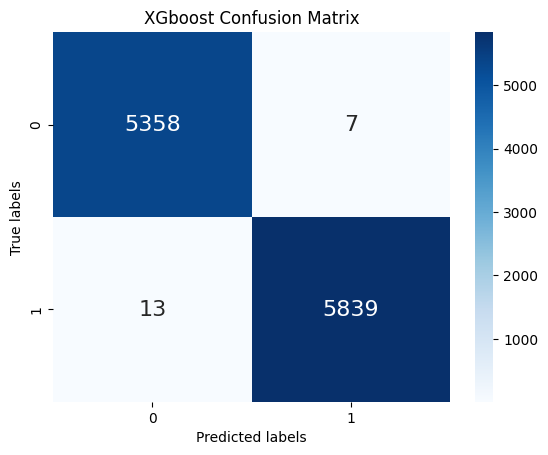

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Creating a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Setting labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGboost Confusion Matrix')

# Displaying the plot
plt.show()

**Printing the values of X_test variable**

In [ ]:
print(X_test_tfidf)

  (0, 4982)	0.06410511768782838
  (0, 4965)	0.02194190442111655
  (0, 4962)	0.013453180469267651
  (0, 4949)	0.022999746237186307
  (0, 4942)	0.041760895816669225
  (0, 4937)	0.02947168460381643
  (0, 4931)	0.02044086116989009
  (0, 4928)	0.024664627276334637
  (0, 4926)	0.017741235067080367
  (0, 4924)	0.05403589336819589
  (0, 4918)	0.021010142597799104
  (0, 4909)	0.027936530284131428
  (0, 4907)	0.03908068126955802
  (0, 4892)	0.05457928305440691
  (0, 4883)	0.04248339183841714
  (0, 4868)	0.010756748634976587
  (0, 4856)	0.027525322374797146
  (0, 4854)	0.03126069957910452
  (0, 4852)	0.023580659025457952
  (0, 4850)	0.0529048924568895
  (0, 4848)	0.07436299722156864
  (0, 4845)	0.016896124301812733
  (0, 4844)	0.030238421534696008
  (0, 4841)	0.028152015120207614
  (0, 4833)	0.010993524680167115
  :	:
  (11216, 403)	0.053358835950144
  (11216, 386)	0.042454433890796756
  (11216, 382)	0.13274646881041205
  (11216, 375)	0.04394833228661106
  (11216, 368)	0.04751830189877203
  (1121

**Prediction**

In [ ]:
X_predict = X_test_tfidf[1]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


In [ ]:
X_predict = X_test_tfidf[15]

prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


# **Support Vector Machine**

In [ ]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions, scoring='accuracy', n_iter=5, cv=stratified_kfold, verbose=1, random_state=1)

**Training SVM**

In [ ]:
start_time_svm_training = time.time()

random_search.fit(X_train_tfidf, y_train)


end_time_svm_training = time.time()
elapsed_time_svm_training = end_time_svm_training - start_time_svm_training

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print(f"Time taken: {elapsed_time_svm_training} seconds")
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

Time taken: 5589.640114545822 seconds
Best Parameters:  {'C': 1.4203244934421582, 'kernel': 'linear'}
Best Accuracy:  0.994739970282318


**Testing the SVM**

In [ ]:
start_time_svm_testing = time.time()


X_test_tfidf= tfidf_vectorizer.transform(X_test)
y_pred = random_search.predict(X_test_tfidf)


accuracyscore = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for Support vector Machine :",accuracyscore)
print("\n******************************************************\n")
print(classification_report(y_test, y_pred))

end_time_svm_testing = time.time()
elapsed_time_svm_testing = end_time_svm_testing - start_time_svm_testing
print("\n******************************************************\n")
print(f"Time taken: {elapsed_time_svm_testing} seconds")

Accuracy score for Support vector Machine : 0.9950967281804404

******************************************************

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5365
           1       1.00      0.99      1.00      5852

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217


******************************************************

Time taken: 70.76569533348083 seconds


**Confusion Matrix for SVM**

Confusion Matrix:
[[5340   25]
 [  30 5822]]


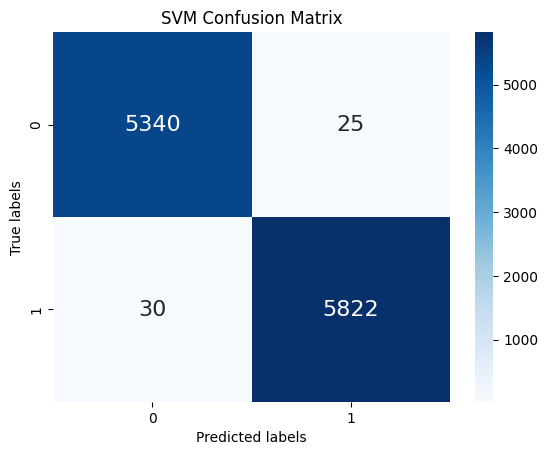

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVM Confusion Matrix')

# Display the plot
plt.show()

**Printing the X_test Values**

In [ ]:
print(X_test_tfidf)

  (0, 0)	0.018370826648452517
  (0, 45)	0.027906239320711256
  (0, 69)	0.010325784534496429
  (0, 80)	0.030830270272406
  (0, 148)	0.03267014417524043
  (0, 155)	0.031046766652926445
  (0, 168)	0.02138403573459186
  (0, 181)	0.023674814864327723
  (0, 191)	0.023263438797453212
  (0, 213)	0.032444456592429685
  (0, 214)	0.019344464082053793
  (0, 215)	0.011685346600732172
  (0, 218)	0.023626040320220636
  (0, 228)	0.03187559596475056
  (0, 232)	0.05968791687730208
  (0, 237)	0.026848936597147797
  (0, 250)	0.12013702764989648
  (0, 264)	0.019425836010175657
  (0, 278)	0.031117263047481317
  (0, 294)	0.02574768658382726
  (0, 301)	0.026000479555936488
  (0, 324)	0.020514066517831123
  (0, 340)	0.024498218282341028
  (0, 352)	0.07440751275361557
  (0, 355)	0.009429254141855057
  :	:
  (11216, 4723)	0.10884314712852108
  (11216, 4726)	0.04332984932773236
  (11216, 4742)	0.03268396165230463
  (11216, 4746)	0.047312618009433406
  (11216, 4780)	0.04369223821072965
  (11216, 4781)	0.0593409642

**Prediction**

In [ ]:
X_predict = X_test_tfidf[0]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[0]
True


In [ ]:
X_predict = X_test_tfidf[16]


prediction = random_search.predict(X_predict)
print(prediction)

if(prediction[0]==1):
  print("Fake")
else:
  print("True")

[1]
Fake


## **Comparison of models for accuracy using ROC graph**

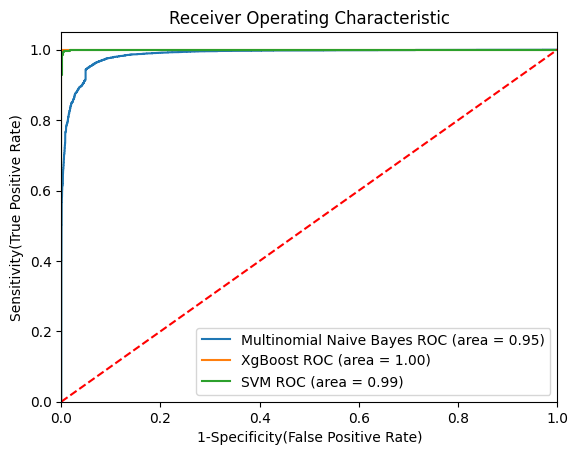

In [ ]:
plt.figure()

# adding the models
models = [
    {
        'label': 'Multinomial Naive Bayes',
        'model': MultinomialNB(),
    },
    {
        'label': 'XgBoost',
        'model': xgb.XGBClassifier(),
    },
    {
        'label': 'SVM',
        'model': SVC(probability=True),  # Set probability=True for SVC
    }
]

# for loop iterating through model dictionary
for m in models:
    model = m['model']  # select the model
    model.fit(X_train_tfidf, y_train)  # training the model
    y_pred = model.predict(X_test_tfidf)  # predicting the test data

    # Computing False positive rate, and True positive rate
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
    else:
        # For models that don't have predict_proba, use the decision function
        decision_values = model.decision_function(X_test_tfidf)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, decision_values)

    # Calculating Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, y_pred)

    # Plotting the graph
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))


plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  # Display

# **Comparing the training time and testing among selected models**

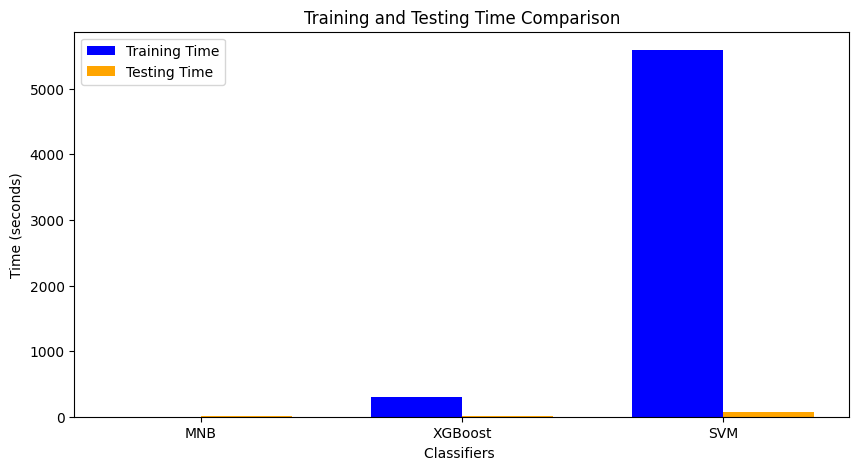

In [ ]:
models = ['MNB', 'XGBoost', 'SVM']
training_times = [elapsed_time_MNB_training, elapsed_time_xgb_training, elapsed_time_svm_training]
testing_times = [elapsed_time_MNB_testing,elapsed_time_xgb_testing,elapsed_time_svm_testing]

# Plotting both training and testing times in the same plot
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 5))
plt.bar(index, training_times, width=bar_width, color='blue', label='Training Time')
plt.bar(index + bar_width, testing_times, width=bar_width, color='orange', label='Testing Time')
plt.xlabel('Classifiers ')
plt.ylabel('Time (seconds)')
plt.title('Training and Testing Time Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()